In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [3]:
dataset_directory='./CMAPSSData/'
index_names=['unit_nr','time_cycles']
setting_names=[f'setting_{i}' for i in range(1,4)]
sensor_names=[f's_{i}' for i in range(1,22)]
col_names=index_names+setting_names+sensor_names
train=pd.read_csv((dataset_directory+'train_FD001.txt'),sep='\s+',header=None,names=col_names)
test=pd.read_csv((dataset_directory+'test_FD001.txt'),sep='\s+',header=None,names=col_names)
actual=pd.read_csv((dataset_directory+'RUL_FD001.txt'),sep='\s+',header=None,names=['RUL'])
actual=actual.to_numpy().flatten().tolist()

In [4]:
train.loc[train['unit_nr']==1]

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [5]:
test

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [6]:
len(actual)

100

In [7]:
max_cycle_train=[]
for i in range(1,101):
    row=train.loc[train['unit_nr']==i]
    max_cycle_train.append(row['time_cycles'].max())

max_cycle_test=[]
for i in range(100):
    row=test.loc[test['unit_nr']==i+1]['time_cycles']
    max_cycle_test.append(len(row)+int(actual[i]))

In [8]:
def add_rul(data,max_cycle):
    RUL=[]
    for i,j in enumerate(max_cycle):
        row=data.loc[data['unit_nr']==i+1]['time_cycles']
        for k in row:
            RUL.append(j-k)
    return RUL

train_rul=pd.DataFrame(add_rul(train,max_cycle_train))
train['RUL']=train_rul.clip(upper=130)
test['RUL']=(add_rul(test,max_cycle_test))

In [9]:
train

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,130
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,130
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,130
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,130
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


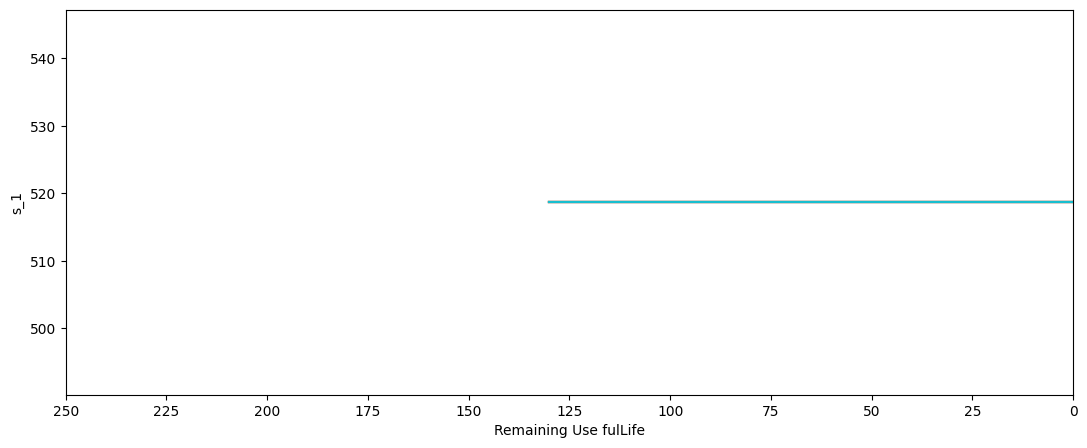

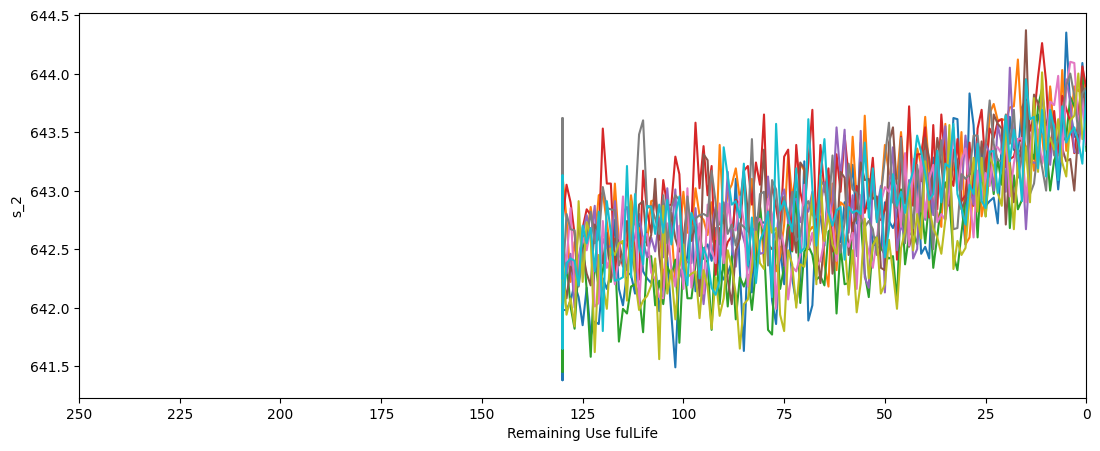

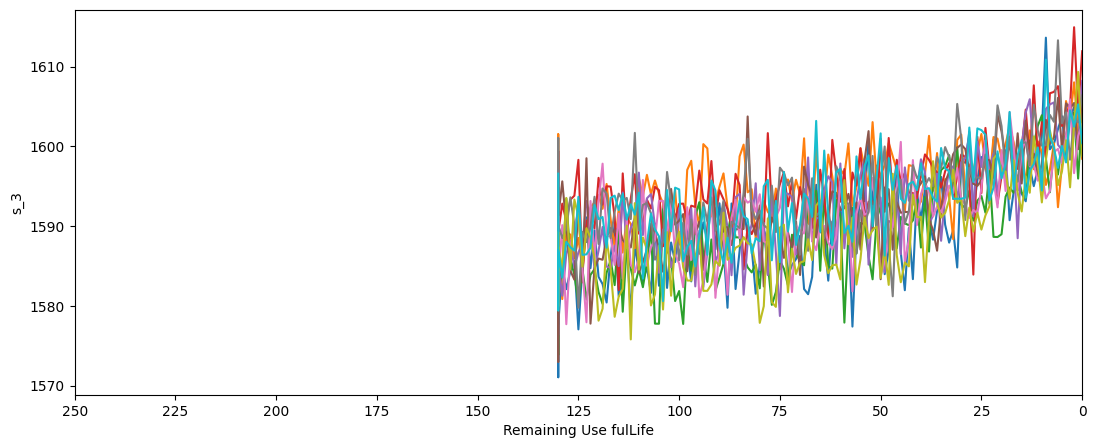

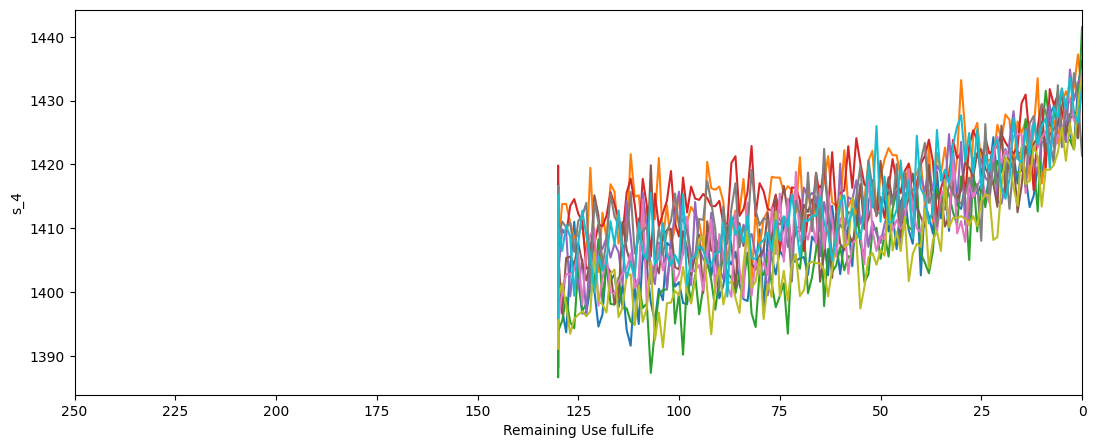

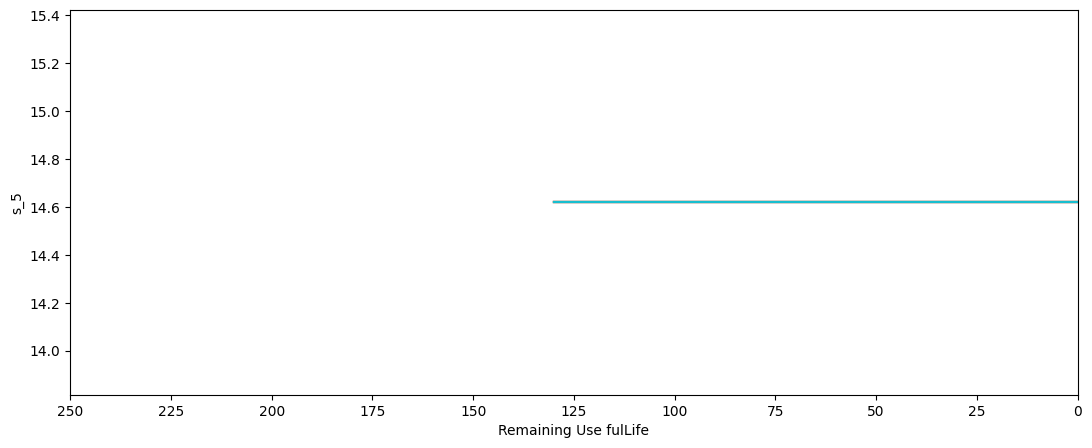

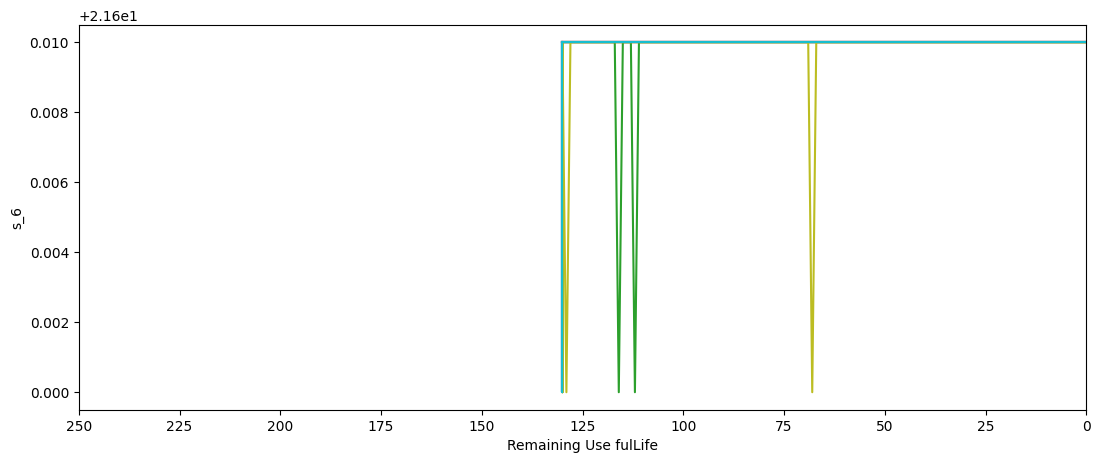

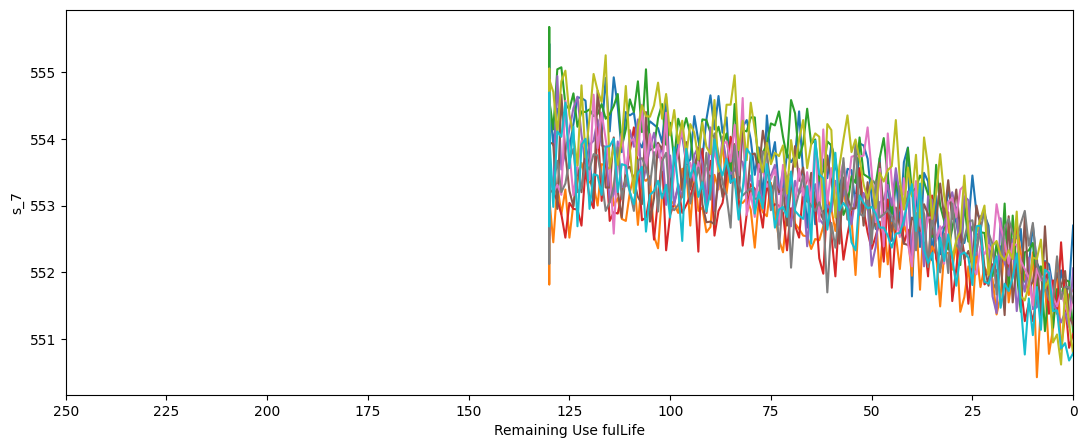

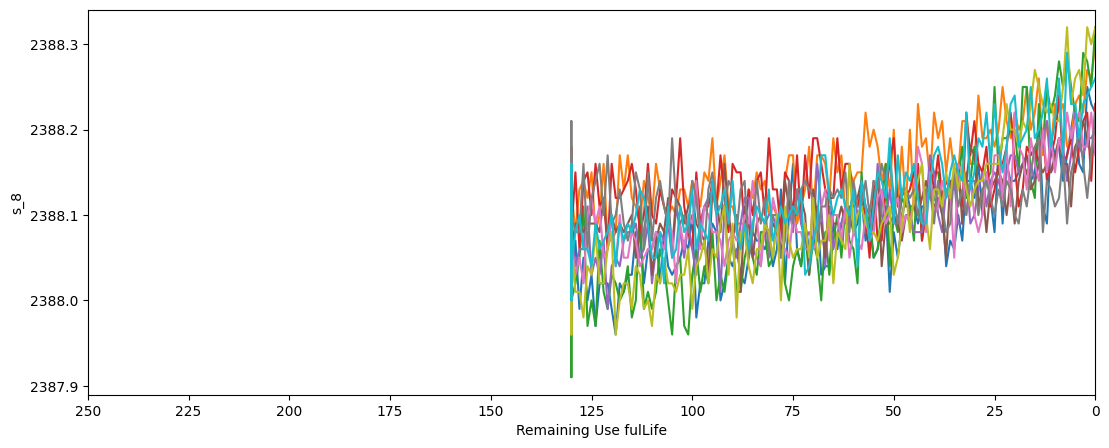

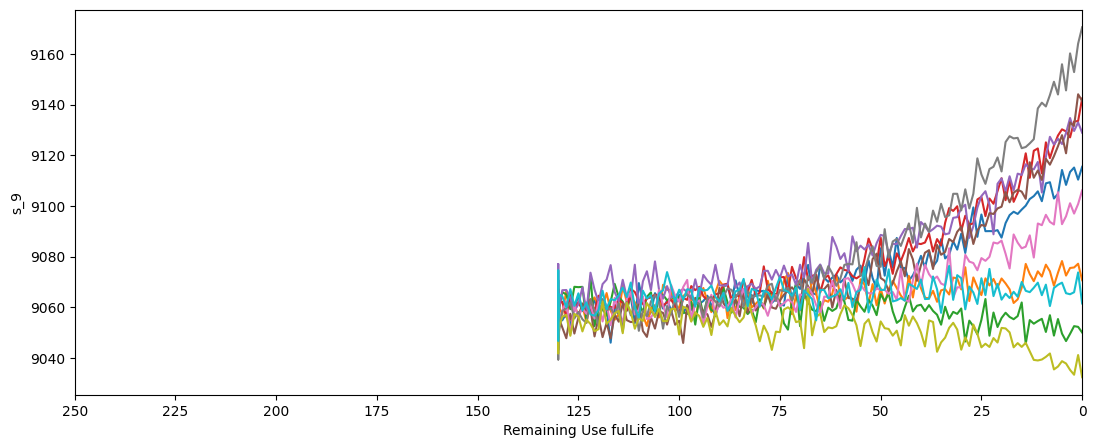

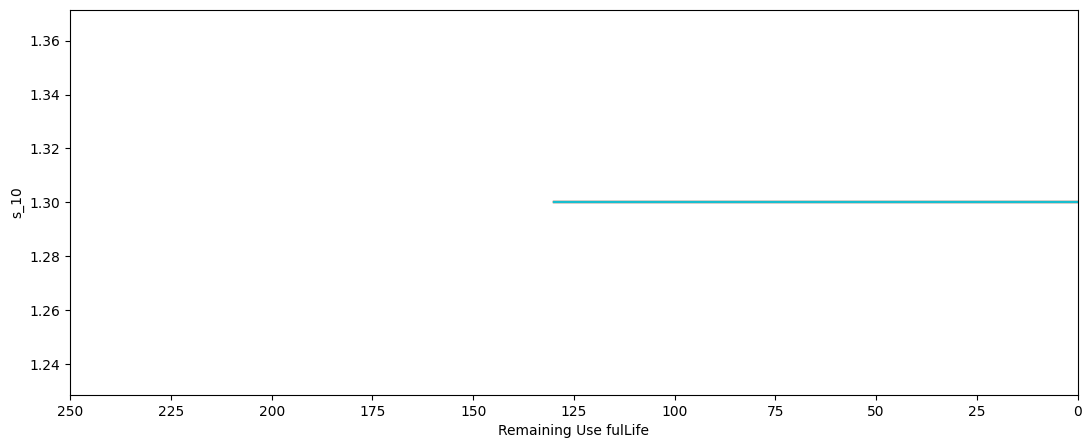

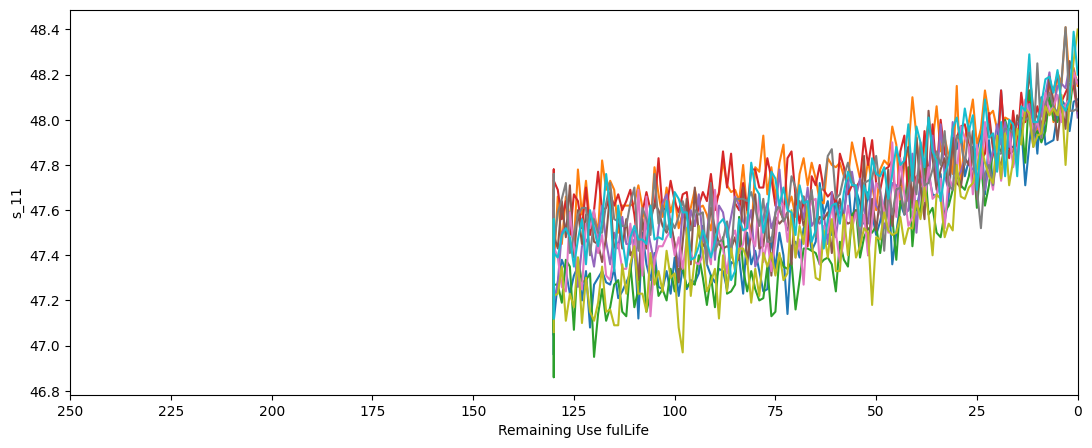

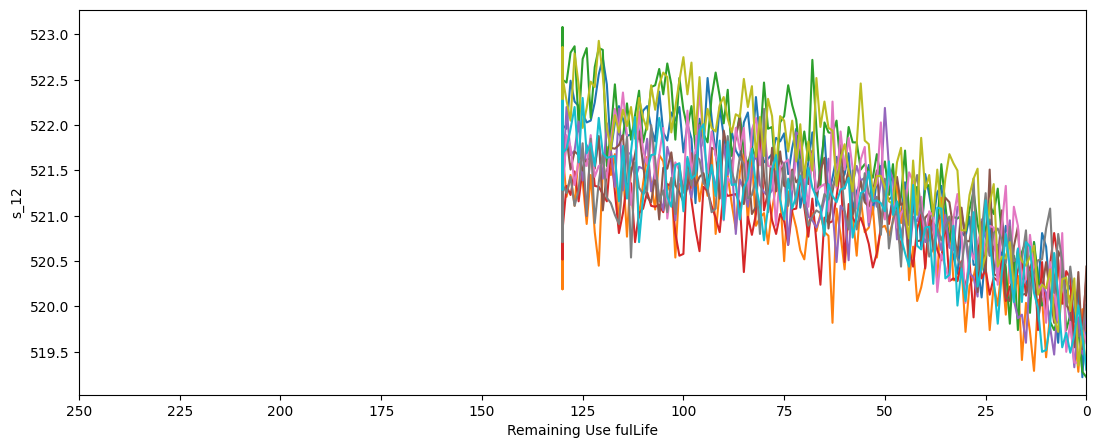

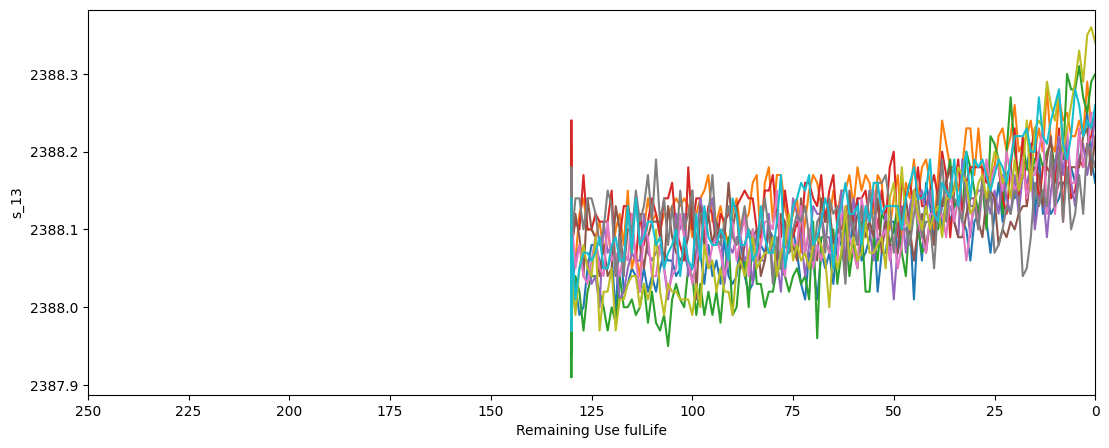

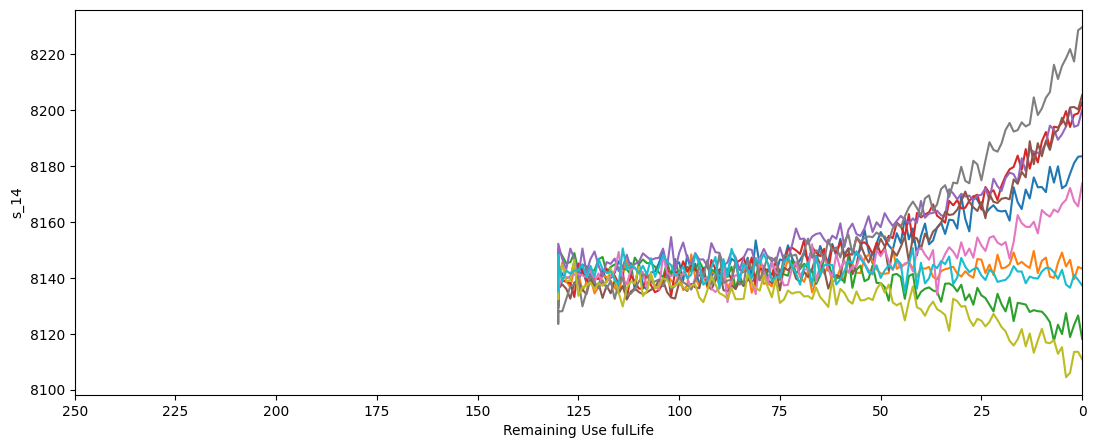

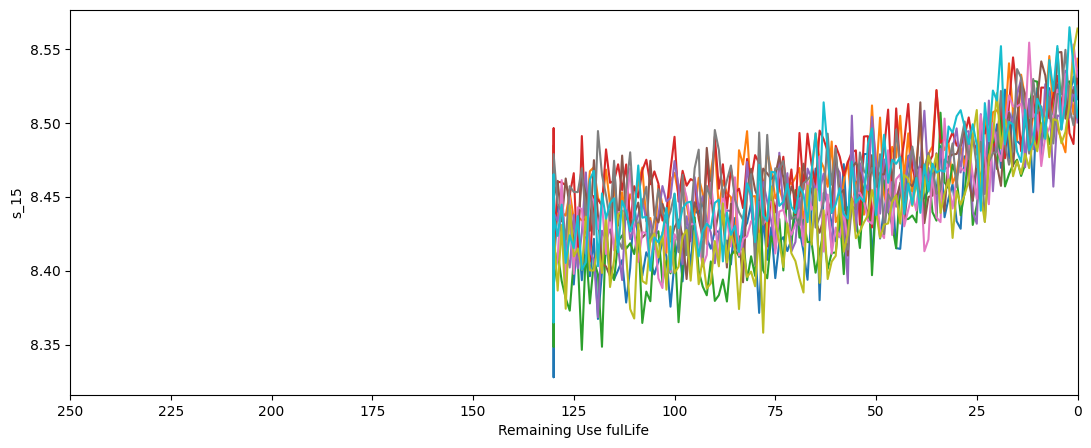

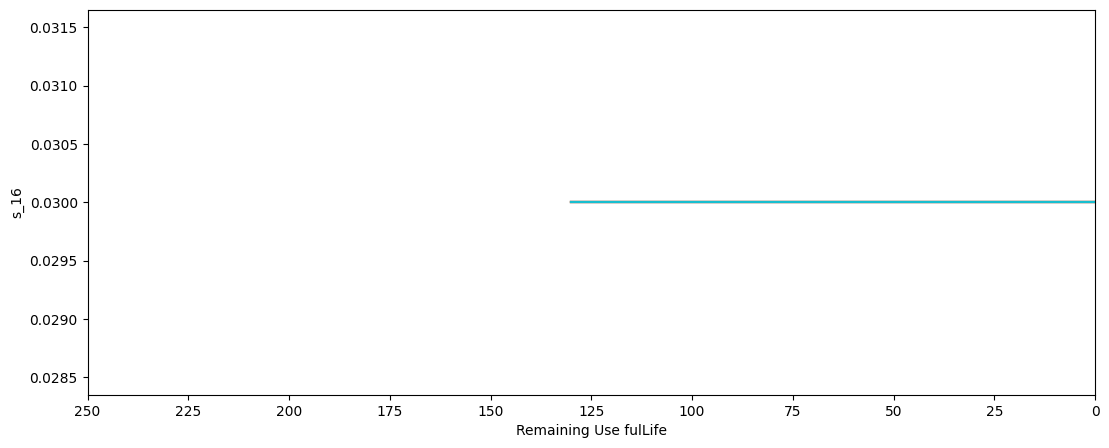

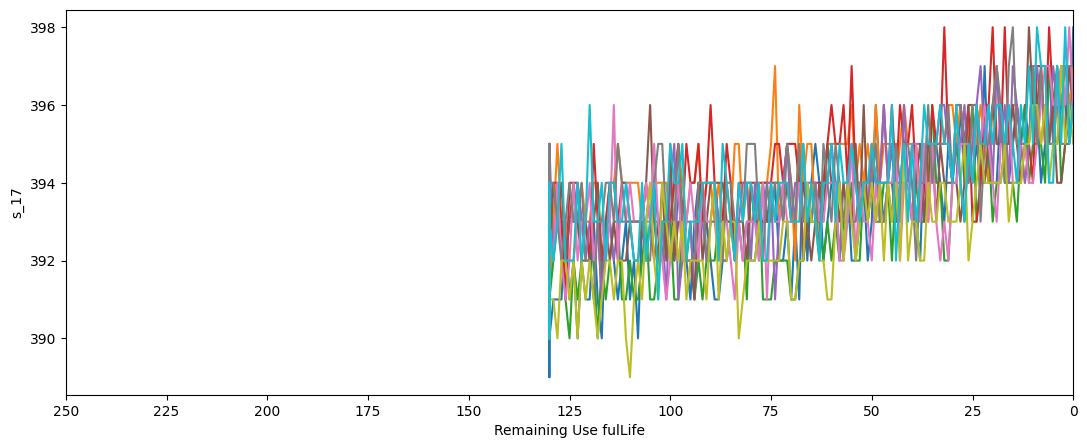

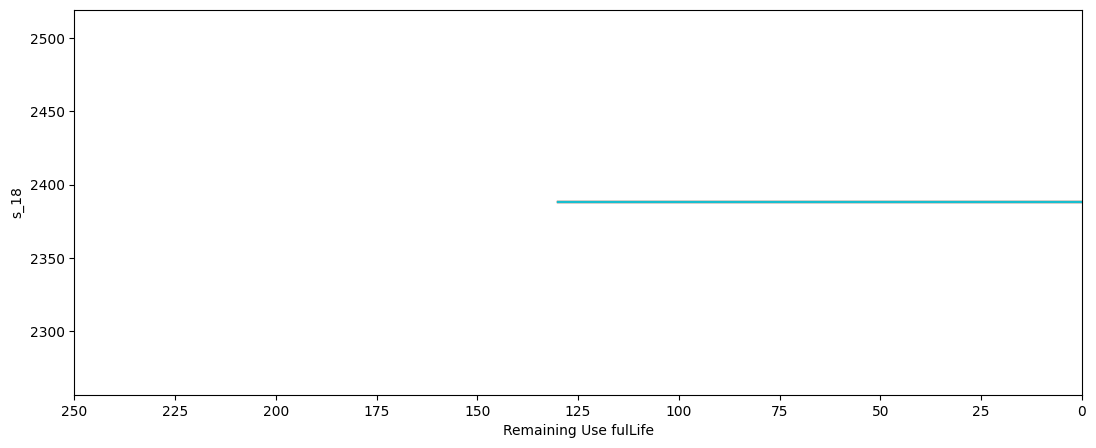

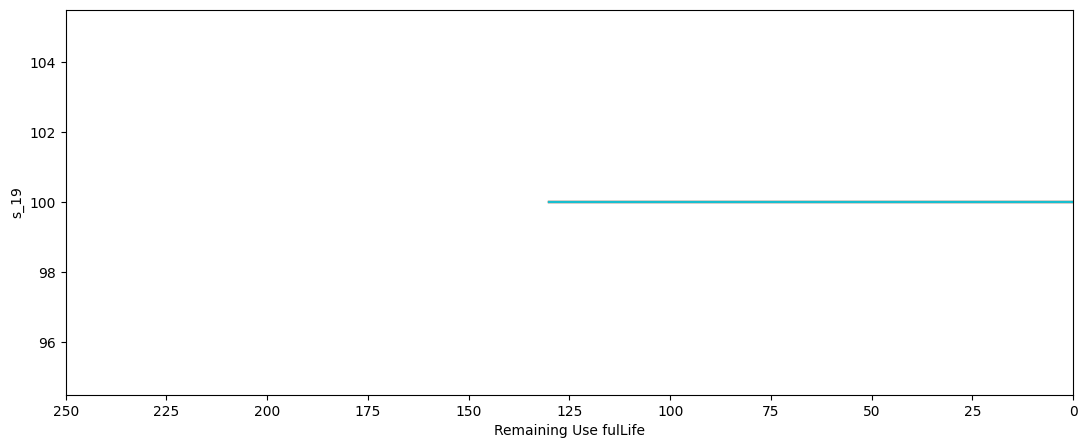

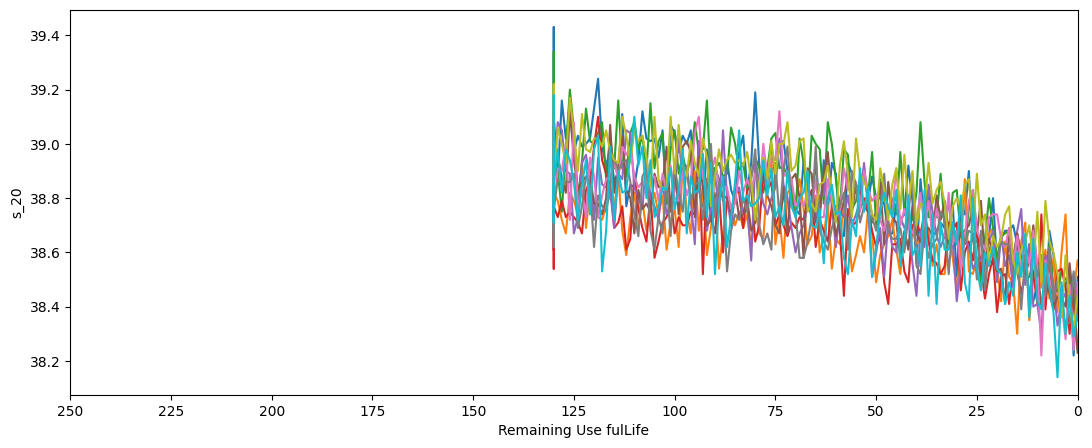

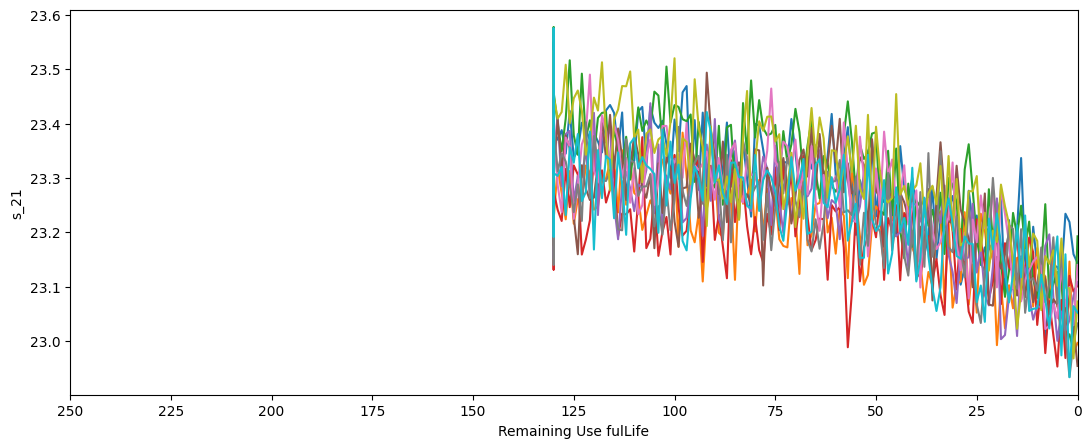

In [10]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

In [11]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
index_names=['time_cycles']
drop_labels = index_names+setting_names+drop_sensors
X_train = train.drop(drop_labels, axis=1)
X_test = test.drop(drop_labels, axis=1)

In [12]:
col_to_scale=X_train.columns.to_list()
col_to_scale.pop(0)
col_to_scale.pop(-1)

'RUL'

In [13]:
col_to_scale

['s_2',
 's_3',
 's_4',
 's_7',
 's_8',
 's_9',
 's_11',
 's_12',
 's_13',
 's_14',
 's_15',
 's_17',
 's_20',
 's_21']

In [14]:
def exponential_smoothing(df, sensors, alpha=0.4):
    cf=[]
    for i in sensors:
        C=df[i].copy()
        X=[C[0]]
        for i in range(1,len(C)):
            X.append(alpha * C[i-1]+(1-alpha)*X[i-1])
        cf.append(X)
    return np.array(cf)
        
e_train=exponential_smoothing(X_train,col_to_scale,0.1)
e_test=exponential_smoothing(X_test,col_to_scale,0.1)
ex_train=X_train.copy()
ex_test=X_test.copy()
for i,j in enumerate(col_to_scale):
    ex_train[j]=e_train[i]
for i,j in enumerate(col_to_scale):
    ex_test[j]=e_test[i]

In [15]:
ex_train

,unit_nr,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
0,1,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.660000,2388.020000,8138.620000,8.419500,392.000000,39.060000,23.419000,130
1,1,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.660000,2388.020000,8138.620000,8.419500,392.000000,39.060000,23.419000,130
2,1,641.853000,1589.912000,1400.854000,554.299000,2388.058000,9045.978000,47.472000,521.722000,2388.025000,8137.907000,8.420730,392.000000,39.054000,23.419460,130
3,1,641.902700,1589.719800,1401.188600,554.295100,2388.060200,9046.674200,47.451800,521.791800,2388.025500,8137.439300,8.420437,391.800000,39.043600,23.411934,130
4,1,641.947430,1589.026820,1401.256740,554.310590,2388.065180,9046.954780,47.419620,521.898620,2388.030950,8137.078370,8.415213,391.820000,39.027240,23.408131,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,643.389837,1598.967691,1424.186692,551.755499,2388.214579,9066.947839,48.042767,520.115959,2388.220888,8141.639313,8.506822,395.473519,38.472937,23.125777,4
20627,100,643.399853,1598.868922,1424.631023,551.722949,2388.212121,9066.805055,48.045490,520.053363,2388.224799,8141.235381,8.505700,395.626167,38.474643,23.110549,3
20628,100,643.413868,1599.432030,1425.525921,551.636654,2388.213909,9066.635549,48.044941,520.016027,2388.224319,8140.761843,8.506520,395.563550,38.457179,23.115434,2
20629,100,643.414481,1599.734827,1425.791329,551.566989,2388.216518,9066.561994,48.049447,520.015424,2388.225888,8140.790659,8.512328,395.807195,38.455461,23.097221,1


In [16]:
scaler=MinMaxScaler()
def scaling(x_scale):
    x_scale[col_to_scale]=scaler.fit_transform(x_scale[col_to_scale])
    return x_scale
ex_train=scaling(ex_train)
ex_test=scaling(ex_test)

In [17]:
ex_train

,unit_nr,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
0,1,0.000000,0.350761,0.192273,0.874616,0.243775,0.091172,0.357022,0.685246,0.132791,0.207214,0.266486,0.193232,0.932628,0.898536,130
1,1,0.000000,0.350761,0.192273,0.874616,0.243775,0.091172,0.357022,0.685246,0.132791,0.207214,0.266486,0.193232,0.932628,0.898536,130
2,1,0.017242,0.360157,0.199704,0.857018,0.237332,0.089917,0.358955,0.706534,0.148125,0.202554,0.275325,0.193232,0.923689,0.899696,130
3,1,0.043210,0.351639,0.209494,0.855893,0.244420,0.094039,0.339433,0.730500,0.149658,0.199497,0.273220,0.158014,0.908193,0.880718,130
4,1,0.066581,0.320927,0.211487,0.860362,0.260463,0.095701,0.308333,0.767176,0.166372,0.197138,0.235678,0.161536,0.883817,0.871127,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,0.820229,0.761488,0.882347,0.123227,0.741775,0.214087,0.910567,0.155102,0.748864,0.226947,0.894049,0.804884,0.057931,0.159113,4
20627,100,0.825463,0.757111,0.895346,0.113836,0.733856,0.213241,0.913199,0.133610,0.760859,0.224307,0.885984,0.831763,0.060473,0.120713,3
20628,100,0.832785,0.782067,0.921528,0.088941,0.739616,0.212237,0.912668,0.120790,0.759387,0.221212,0.891878,0.820737,0.034452,0.133032,2
20629,100,0.833106,0.795486,0.929293,0.068842,0.748022,0.211802,0.917023,0.120583,0.764196,0.221400,0.933619,0.863641,0.031892,0.087103,1


In [18]:
rbm_train=ex_train[col_to_scale].to_numpy()
rbm_test=ex_test[col_to_scale].to_numpy()

In [19]:
import numpy as np
import math

class GaussianRBM:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.weights = np.random.randn(num_visible, num_hidden)
        self.visible_bias = np.zeros(num_visible)
        self.hidden_bias = np.zeros(num_hidden)

    def sigmoid(self, x):
        m=[]
        shape=x.shape
        x=x.flatten()
        for i in x:
            m.append(1.0 / (1.0 + math.exp(-i)))
        return np.array(m).reshape(shape)

    def sample_hidden_given_visible(self, visible_data):
        hidden_activations = np.dot(visible_data, self.weights) + self.hidden_bias
        hidden_samples = np.random.normal(loc=self.sigmoid(hidden_activations), scale=1)
        return hidden_samples

    def sample_visible_given_hidden(self, hidden_data):
        visible_activations = np.dot(hidden_data, self.weights.T) + self.visible_bias
        visible_samples = np.random.normal(loc=self.sigmoid(visible_activations), scale=1)
        return visible_samples

    def gibbs_sampling(self, visible_data, num_steps=1):
        for _ in range(num_steps):
            hidden_samples = self.sample_hidden_given_visible(visible_data)
            visible_samples = self.sample_visible_given_hidden(hidden_samples)
        return visible_samples
    
    def evaluate(self,y_true, y_hat):
        mse = mean_squared_error(y_true, y_hat)
        rmse = np.sqrt(mse)
        return rmse

    def train(self, data, num_epochs=1,learning_rate=0.1):
        f=[]
        for i in data:
            i=i.reshape(1,14)
            m=[]
            min_rmse=1000
            for j in range(num_epochs):
                hidden_samples = self.sample_hidden_given_visible(i)
                visible_samples = self.sample_visible_given_hidden(hidden_samples)
                
                sample_rmse=self.evaluate(i,visible_samples)
                
                if sample_rmse<min_rmse:
                    min_rmse=sample_rmse
                    min_sample=hidden_samples
                
                positive_hidden_activations = np.dot(i, self.weights) + self.hidden_bias
                positive_hidden_probs = self.sigmoid(positive_hidden_activations)
                positive_associations = np.dot(i.T, positive_hidden_probs)

                negative_hidden_activations = np.dot(visible_samples, self.weights) + self.hidden_bias
                negative_hidden_probs = self.sigmoid(negative_hidden_activations)
                negative_associations = np.dot(visible_samples.T, negative_hidden_probs)

                # Update parameters
                self.weights += learning_rate * (positive_associations - negative_associations) 
                self.visible_bias += learning_rate * np.mean(i - visible_samples, axis=0)
                self.hidden_bias += learning_rate * np.mean(positive_hidden_probs - negative_hidden_probs, axis=0)
                if j==num_epochs-1:
                    m.append(min_sample)
            f.append(m)
        return f
                

In [20]:
rbm=GaussianRBM(14,64)
new_x_train=rbm.train(rbm_train,num_epochs=100,learning_rate=0.01)
new_x_test=rbm.train(rbm_test,num_epochs=100,learning_rate=0.01)

KeyboardInterrupt: 

In [ ]:
new_x_train=np.array(new_x_train).reshape(20631,64)
new_x_test=np.array(new_x_test).reshape(13096,64)

In [ ]:
new_cols=[f's_{i}' for i in range(1,65)]
nx_train=pd.DataFrame(new_x_train,columns=new_cols)
nx_test=pd.DataFrame(new_x_test,columns=new_cols)

In [ ]:
nx_train[['unit_nr','RUL']]=X_train[['unit_nr','RUL']]
nx_test[['unit_nr','RUL']]=X_test[['unit_nr','RUL']]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences as pad
def sequences(x,window=25):
    M=[]
    N=[]
    cnt=[]
    for i in range(1,101):
        sub_train=x.loc[x['unit_nr']==i]
        array=sub_train.to_numpy()
        X=[]
        Y=[]
        count=0
        label=list()
        for j in range(len(array)-window):
            row=[a for a in array[j:j+window,0:64]]
            X.append(row)
            label=array[j+window,65:66]
            Y.append(label)
            count+=1
        for j in range(len(array)-window,len(array)):
            row=[a for a in array[j:len(array),0:64]]
            X.append(row)
            m=array[len(array)-1,65:66]
            Y.append([-100])
        cnt.append(count)
        padded_sequences = pad(X, padding='post', dtype='float32',value=-100)
        M.append(padded_sequences)
        N.append(Y)
    X_sequences=pad(M, padding='post', dtype='float32',value=-100)
    Y_sequences=pad(N, padding='post', dtype='float32',value=-100)
    return np.array(X_sequences),np.array(Y_sequences),cnt

seq_x_train,seq_y_train,count1=sequences(nx_train)
seq_x_test,seq_y_test,count2=sequences(nx_test)

In [ ]:
seq_x_train.shape

(100, 362, 25, 64)

In [ ]:
x_train=seq_x_train.reshape(36200,25,64)
x_test=seq_x_test.reshape(30300,25,64)
y_train=seq_y_train.flatten()
y_test=seq_y_test.flatten()
x1,y1=x_train[:28960],y_train[:28960]
x2,y2=x_train[28960:],y_train[28960:]

In [ ]:
x_train

NameError: name 'x_train' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Masking,Dense,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import glorot_normal

model1 = Sequential()
model1.add(Masking(mask_value=-100,input_shape=(25,64)))
model1.add(LSTM(256,activation='sigmoid',kernel_initializer=glorot_normal(seed=42)))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 25, 64)            0         
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense (Dense)               (None, 8)                 2056      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 330769 (1.26 MB)
Trainable params: 330769 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(x1, y1, validation_data=(x2, y2), epochs=10, callbacks=[cp1],batch_size=362)

Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 7390.2798 - root_mean_squared_error: 85.9667INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 113s 1s/step - loss: 7390.2798 - root_mean_squared_error: 85.9667 - val_loss: 6394.8960 - val_root_mean_squared_error: 79.9681
Epoch 2/10
80/80 [==============================] - ETA: 0s - loss: 5930.5981 - root_mean_squared_error: 77.0104INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 99s 1s/step - loss: 5930.5981 - root_mean_squared_error: 77.0104 - val_loss: 5924.4443 - val_root_mean_squared_error: 76.9704
Epoch 3/10
80/80 [==============================] - ETA: 0s - loss: 4600.3413 - root_mean_squared_error: 67.8258INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 103s 1s/step - loss: 4600.3413 - root_mean_squared_error: 67.8258 - val_loss: 5082.7344 - val_root_mean_squared_error: 71.2933
Epoch 4/10
80/80 [==============================] - ETA: 0s - loss: 3472.6113 - root_mean_squared_error: 58.9289INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 3022s 38s/step - loss: 3472.6113 - root_mean_squared_error: 58.9289 - val_loss: 4674.7236 - val_root_mean_squared_error: 68.3719
Epoch 5/10
80/80 [==============================] - ETA: 0s - loss: 2495.9404 - root_mean_squared_error: 49.9594INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 35s 434ms/step - loss: 2495.9404 - root_mean_squared_error: 49.9594 - val_loss: 3900.3164 - val_root_mean_squared_error: 62.4525
Epoch 6/10
80/80 [==============================] - ETA: 0s - loss: 1710.9099 - root_mean_squared_error: 41.3631INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 27s 338ms/step - loss: 1710.9099 - root_mean_squared_error: 41.3631 - val_loss: 3186.6060 - val_root_mean_squared_error: 56.4500
Epoch 7/10
80/80 [==============================] - ETA: 0s - loss: 1051.0096 - root_mean_squared_error: 32.4193INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 27s 337ms/step - loss: 1051.0096 - root_mean_squared_error: 32.4193 - val_loss: 2774.9536 - val_root_mean_squared_error: 52.6778
Epoch 8/10
80/80 [==============================] - ETA: 0s - loss: 571.7529 - root_mean_squared_error: 23.9114INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 27s 342ms/step - loss: 571.7529 - root_mean_squared_error: 23.9114 - val_loss: 2313.9990 - val_root_mean_squared_error: 48.1040
Epoch 9/10
80/80 [==============================] - ETA: 0s - loss: 267.5985 - root_mean_squared_error: 16.3584INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 27s 340ms/step - loss: 267.5985 - root_mean_squared_error: 16.3584 - val_loss: 2150.5334 - val_root_mean_squared_error: 46.3738
Epoch 10/10
80/80 [==============================] - ETA: 0s - loss: 113.3603 - root_mean_squared_error: 10.6471INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


80/80 [==============================] - 27s 343ms/step - loss: 113.3603 - root_mean_squared_error: 10.6471 - val_loss: 2044.4807 - val_root_mean_squared_error: 45.2159


In [ ]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
model1 = load_model('model1/')

In [ ]:
result=model1.predict(x_test)

947/947 [==============================] - 24s 25ms/step


In [ ]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    print(f'set RMSE:{rmse}')
    
evaluate(y_test,result)

set RMSE:58.19548797607422


In [ ]:
result=result.round().reshape(100,303,1)
count=count2
new_result=[]
for i,j in enumerate(count):
    row=result[i]
    nrow=row[j-1]
    m=nrow.flatten()
    g=m.tolist()
    new_result.append(g)

In [ ]:
count

[6,
 24,
 101,
 81,
 73,
 80,
 135,
 141,
 30,
 167,
 58,
 192,
 170,
 21,
 51,
 88,
 140,
 108,
 110,
 159,
 123,
 14,
 105,
 161,
 23,
 51,
 115,
 133,
 146,
 118,
 171,
 120,
 25,
 178,
 173,
 101,
 96,
 100,
 12,
 108,
 98,
 131,
 147,
 29,
 127,
 121,
 48,
 53,
 278,
 49,
 119,
 164,
 139,
 96,
 88,
 111,
 135,
 151,
 69,
 122,
 134,
 207,
 130,
 143,
 46,
 122,
 46,
 162,
 29,
 127,
 43,
 106,
 87,
 112,
 63,
 180,
 137,
 47,
 76,
 108,
 188,
 137,
 48,
 147,
 9,
 85,
 31,
 43,
 152,
 121,
 209,
 125,
 219,
 108,
 64,
 72,
 109,
 96,
 72,
 173]

In [ ]:
new_result

[[47.0],
 [52.0],
 [65.0],
 [72.0],
 [100.0],
 [56.0],
 [24.0],
 [69.0],
 [76.0],
 [46.0],
 [87.0],
 [82.0],
 [38.0],
 [48.0],
 [87.0],
 [59.0],
 [122.0],
 [81.0],
 [100.0],
 [97.0],
 [96.0],
 [91.0],
 [82.0],
 [94.0],
 [54.0],
 [67.0],
 [108.0],
 [105.0],
 [60.0],
 [110.0],
 [59.0],
 [58.0],
 [68.0],
 [78.0],
 [78.0],
 [59.0],
 [67.0],
 [70.0],
 [60.0],
 [79.0],
 [91.0],
 [58.0],
 [76.0],
 [109.0],
 [47.0],
 [75.0],
 [53.0],
 [63.0],
 [84.0],
 [75.0],
 [101.0],
 [73.0],
 [72.0],
 [80.0],
 [121.0],
 [93.0],
 [65.0],
 [87.0],
 [57.0],
 [56.0],
 [76.0],
 [105.0],
 [100.0],
 [80.0],
 [91.0],
 [61.0],
 [103.0],
 [82.0],
 [103.0],
 [102.0],
 [74.0],
 [68.0],
 [67.0],
 [54.0],
 [50.0],
 [96.0],
 [58.0],
 [94.0],
 [78.0],
 [70.0],
 [109.0],
 [70.0],
 [95.0],
 [45.0],
 [47.0],
 [98.0],
 [65.0],
 [77.0],
 [51.0],
 [96.0],
 [62.0],
 [81.0],
 [74.0],
 [44.0],
 [50.0],
 [45.0],
 [83.0],
 [70.0],
 [32.0],
 [62.0]]

In [ ]:
actual

[112,
 98,
 69,
 82,
 91,
 93,
 91,
 95,
 111,
 96,
 97,
 124,
 95,
 107,
 83,
 84,
 50,
 28,
 87,
 16,
 57,
 111,
 113,
 20,
 145,
 119,
 66,
 97,
 90,
 115,
 8,
 48,
 106,
 7,
 11,
 19,
 21,
 50,
 142,
 28,
 18,
 10,
 59,
 109,
 114,
 47,
 135,
 92,
 21,
 79,
 114,
 29,
 26,
 97,
 137,
 15,
 103,
 37,
 114,
 100,
 21,
 54,
 72,
 28,
 128,
 14,
 77,
 8,
 121,
 94,
 118,
 50,
 131,
 126,
 113,
 10,
 34,
 107,
 63,
 90,
 8,
 9,
 137,
 58,
 118,
 89,
 116,
 115,
 136,
 28,
 38,
 20,
 85,
 55,
 128,
 137,
 82,
 59,
 117,
 20]

In [ ]:
evaluate(actual,new_result)

set RMSE:49.32210457796788
